pandas: isnull, fillna, mean(median), dropna, df.values (->to numpy array)

sklearn.impute: sklearn.impute.SimpleImputer / KNNImputer

Nominal features, colors: red blue green
No obvious greater/lesser relationship...
If we simply fit_transform with labelencoder, the model will assume red is greater than green and blue, which is unnecessary and can lead to undefined error.
Thus, we instead use sklearn.compose.OneHotEncoder dropfirst = True

sklearn.model_selection.train_test_split
Train-test splitting, test_size, random_state, stratify = y(preserve the ratio in y)

sklearn.preprocessing.MinMaxScaler(), StandardScaler(), RobustScaler()
Default: penalty = 'l2' solver = 'lbfgs'
penalty = 'l1', solver = 'liblinear', multiclass = 'ovr' (binary) 'multinominal' (nonbinary)

Sequential backward Selection (SBS)
1. k = d
2. remove the one that reduces accuracy score least (maximize accuracy score)
3. remove one
4. check if need extra feature removal

Random Forest classifier feature_importances_
sklearn.feature_selection import SelectfromModel(randforest, threshold = 0.1, max_features = 5, predit = True)

In [162]:
import pandas as pd 
from io import StringIO
import sys

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

# If you are using Python 2.7, you need
# to convert the string to unicode:

if (sys.version_info < (3, 0)):
    csv_data = unicode(csv_data)

df = pd.read_csv(StringIO(csv_data))
print(df)
print(df.isnull().sum())
print(df.values)
print(df.dropna(axis = 1))
print(df.dropna(how = 'all'))
print(df.dropna(thresh = 3))
print(df.dropna(subset = ['C', 'D']))

      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN
A    0
B    0
C    1
D    1
dtype: int64
[[ 1.  2.  3.  4.]
 [ 5.  6. nan  8.]
 [10. 11. 12. nan]]
      A     B
0   1.0   2.0
1   5.0   6.0
2  10.0  11.0
      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN
      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN
     A    B    C    D
0  1.0  2.0  3.0  4.0


In [163]:
print(df.fillna(df.mean()))
df.T.fillna(df.mean(axis=1)).T
from sklearn.impute import SimpleImputer
import numpy as np
imr = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=7)
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
print(imputed_data)

from sklearn.impute import KNNImputer
kimr = KNNImputer(n_neighbors=2)
kimr.fit_transform(df.T).T

      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   7.5  8.0
2  10.0  11.0  12.0  6.0
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [10. 11. 12.  7.]]


array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7. ,  8. ],
       [10. , 11. , 12. , 11.5]])

In [164]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df
size_mapping = {'XL': 3, 'L': 2, 'M': 1}
df['size'] = df['size'].map(size_mapping)
print(df)
inverse_size_mapping = {v: k for k, v in size_mapping.items()}
print(inverse_size_mapping)
print(size_mapping.values())
class_mapping = {label: idx for idx, label in enumerate(np.unique(df.classlabel))}
print(class_mapping)
df.classlabel = df.classlabel.map(class_mapping)
print(df)
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])
df.columns = ['color', 'size', 'price', 'classlabel']
df['size'] = df['size'].map(size_mapping)
from sklearn.preprocessing import LabelEncoder
classle = LabelEncoder()
y = classle.fit_transform(df.classlabel.values)
print(y)
print(classle.inverse_transform(y))

   color  size  price classlabel
0  green     1   10.1     class2
1    red     2   13.5     class1
2   blue     3   15.3     class2
{3: 'XL', 2: 'L', 1: 'M'}
dict_values([3, 2, 1])
{'class1': 0, 'class2': 1}
   color  size  price  classlabel
0  green     1   10.1           1
1    red     2   13.5           0
2   blue     3   15.3           1
[1 0 1]
['class2' 'class1' 'class2']


Nominal features, colors: red blue green
No obvious greater/lesser relationship...
If we simply fit_transform with labelencoder, the model will assume red is greater than green and blue, which is unnecessary and can lead to undefined error.
Thus, we instead use

In [165]:
X = df[['color', 'size', 'price']].values
print(X)
color_le = LabelEncoder()

X[:, 0] = color_le.fit_transform(X[:, 0])
print(X)
from sklearn.preprocessing import OneHotEncoder
X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

[['green' 1 10.1]
 ['red' 2 13.5]
 ['blue' 3 15.3]]
[[1 1 10.1]
 [2 2 13.5]
 [0 3 15.3]]


array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [166]:
from sklearn.compose import ColumnTransformer
X = df[['color', 'size', 'price']].values
print(X)
c_transf = ColumnTransformer([('onehot', OneHotEncoder(), [0]), ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X).astype(float)

[['green' 1 10.1]
 ['red' 2 13.5]
 ['blue' 3 15.3]]


array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [167]:
print(pd.get_dummies(df[['price', 'color', 'size']]))
print(pd.get_dummies(df[['price', 'color', 'size']], drop_first=True))

   price  size  color_blue  color_green  color_red
0   10.1     1           0            1          0
1   13.5     2           0            0          1
2   15.3     3           1            0          0
   price  size  color_green  color_red
0   10.1     1            1          0
1   13.5     2            0          1
2   15.3     3            0          0


In [168]:

color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([ ('onehot', color_ohe, [0]),
                               ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

In [169]:
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
print(df)
df['x > M'] = df['size'].apply(lambda x: 1 if x in {'L', 'XL'} else 0)
df['x > L'] = df['size'].apply(lambda x: 1 if x == 'XL' else 0)

del df['size']
print(df)

   color size  price classlabel
0  green    M   10.1     class2
1    red    L   13.5     class1
2   blue   XL   15.3     class2
   color  price classlabel  x > M  x > L
0  green   10.1     class2      0      0
1    red   13.5     class1      1      0
2   blue   15.3     class2      1      1


In [179]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_test)

Class labels [1 2 3]
(124, 13)
(54, 13)
(124,)
(54,)
[1 2 1 1 2 3 2 3 1 3 1 2 3 1 3 3 1 1 3 2 1 3 2 2 2 2 1 3 3 2 1 3 1 2 2 1 2
 1 1 3 3 2 2 2 1 2 2 3 2 3 2 2 1 1]


Decision Tree, and random forest: no worry about feature scaling (scale-invariant)
Others need normalization and standardization
min-max scalling

In [171]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

ex = np.arange(6)
print((ex - ex.mean()) / ex.std())
print((ex - ex.min()) / (ex.max() - ex.min()))


[-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
[0.  0.2 0.4 0.6 0.8 1. ]


In [172]:
ex = np.reshape(ex, (-1, 2))
print(ex)
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()
ex2 = rbs.fit_transform(ex)
print(ex2)

[[0 1]
 [2 3]
 [4 5]]
[[-1. -1.]
 [ 0.  0.]
 [ 1.  1.]]


In [182]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C = 1.0, solver = 'liblinear', multi_class='ovr')
print(X_test_std.shape)
print(y_test.shape)
lr.fit(X_train_std, y_train)
print('Training accuracy', lr.score(X_test_std, y_test))
print(lr.coef_.shape)
print(lr.intercept_.shape)
print(lr.predict(X_test_std[0:1]))

(54, 13)
(54,)
Training accuracy 1.0
(3, 13)
(3,)
[1]


In [185]:
from sklearn.base import clone
from itertools import combinations
import numpy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS:
    def __init__(self, estimator, k_features, \
                 scoring = accuracy_score, \
                 test_size = 0.25, random_state = 1):
        self.scoring = scoring
        self.estimator = estimator
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, X_test, y_train, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r = dim - 1):
                score = self._calc_score(X_train, X_test, y_train, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    def transform(self, X):
        return X[:, self.indices_]
    def _calc_score(self, X_train, X_test, y_train, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score
        

/Users/zeyu/pythonsys/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/zeyu/pythonsys/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

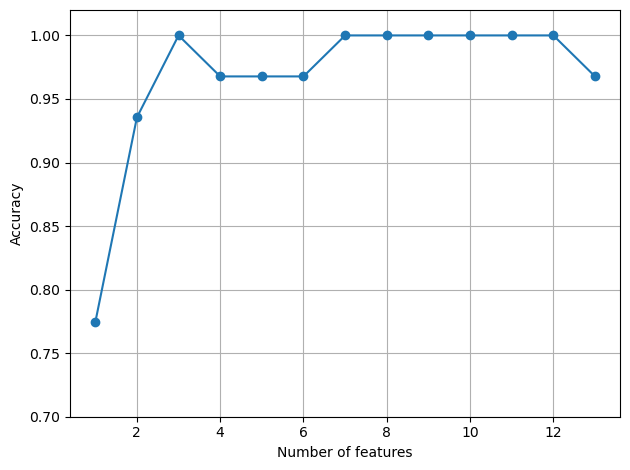

In [188]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('figures/04_09.png', dpi=300)
plt.show()

In [194]:
k3 = list(sbs.subsets_[len(X_train[0]) - 3])
knn.fit(X_train_std[:, k3], y_train)
knn.score(X_test_std[:, k3], y_test)


/Users/zeyu/pythonsys/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9259259259259259

In [197]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


In [201]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, max_features=5, prefit = True)
X_selected = sfm.transform(X_train)
print(len(X_selected[0]))
from sklearn.feature_extraction import 

5
